# **ML ASSIGNMENT 07**

## **ANAGHA ASHOK**

## **21BDA50**

**3.Fit a CNN model on the dataset which has been assigned to you. Print a classification report to see the model metrics on train and test datasets.**

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [2]:

IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/HP/Desktop/sjc/SEM 2/BDA2321 ML 1/Lab 07/Train'
valid_path = 'C:/Users/HP/Desktop/sjc/SEM 2/BDA2321 ML 1/Lab 07/Test'

In [3]:
folders = glob('C:/Users/HP/Desktop/sjc/SEM 2/BDA2321 ML 1/Lab 07/Train/*')

In [4]:
folders

['C:/Users/HP/Desktop/sjc/SEM 2/BDA2321 ML 1/Lab 07/Train\\1Hundrednote',
 'C:/Users/HP/Desktop/sjc/SEM 2/BDA2321 ML 1/Lab 07/Train\\2Hundrednote',
 'C:/Users/HP/Desktop/sjc/SEM 2/BDA2321 ML 1/Lab 07/Train\\2Thousandnote',
 'C:/Users/HP/Desktop/sjc/SEM 2/BDA2321 ML 1/Lab 07/Train\\5Hundrednote',
 'C:/Users/HP/Desktop/sjc/SEM 2/BDA2321 ML 1/Lab 07/Train\\Fiftynote',
 'C:/Users/HP/Desktop/sjc/SEM 2/BDA2321 ML 1/Lab 07/Train\\Tennote',
 'C:/Users/HP/Desktop/sjc/SEM 2/BDA2321 ML 1/Lab 07/Train\\Twentynote']

In [5]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 7, activation = 'softmax'))

In [11]:
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [13]:
training_set = train_datagen.flow_from_directory('C:/Users/HP/Desktop/sjc/SEM 2/BDA2321 ML 1/Lab 07/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 153 images belonging to 7 classes.


In [14]:
test_set = test_datagen.flow_from_directory('C:/Users/HP/Desktop/sjc/SEM 2/BDA2321 ML 1/Lab 07/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 42 images belonging to 7 classes.


In [16]:
# fit the model
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
5/5 [==============================] - 9s 2s/step - loss: 1.9537 - accuracy: 0.1699 - val_loss: 1.9303 - val_accuracy: 0.1429
Epoch 2/50
5/5 [==============================] - 9s 2s/step - loss: 1.9073 - accuracy: 0.1765 - val_loss: 1.8634 - val_accuracy: 0.1429
Epoch 3/50
5/5 [==============================] - 9s 2s/step - loss: 1.7966 - accuracy: 0.2941 - val_loss: 1.7358 - val_accuracy: 0.2381
Epoch 4/50
5/5 [==============================] - 9s 2s/step - loss: 1.6850 - accuracy: 0.3268 - val_loss: 1.5845 - val_accuracy: 0.4762
Epoch 5/50
5/5 [==============================] - 9s 2s/step - loss: 1.6484 - accuracy: 0.3791 - val_loss: 1.6419 - val_accuracy: 0.2857
Epoch 6/50
5/5 [==============================] - 7s 1s/step - loss: 1.5547 - accuracy: 0.3595 - val_loss: 1.5085 - val_accuracy: 0.3571
Epoch 7/50
5/5 [==============================] - 7s 1s/step - loss: 1.4100 - accuracy: 0.4314 - val_loss: 1.4253 - val_accuracy: 0.3810
Epoch 8/50
5/5 [=========================

In [17]:
r.history

{'loss': [1.953725814819336,
  1.907287836074829,
  1.7965680360794067,
  1.6850014925003052,
  1.648373007774353,
  1.554742693901062,
  1.4099730253219604,
  1.2256972789764404,
  1.071542739868164,
  0.995638906955719,
  0.8037683963775635,
  0.710370659828186,
  0.7721518874168396,
  0.641649603843689,
  0.6681737899780273,
  0.5697434544563293,
  0.45074257254600525,
  0.4072028696537018,
  0.38139212131500244,
  0.28088894486427307,
  0.24846863746643066,
  0.20157842338085175,
  0.23928439617156982,
  0.2634795308113098,
  0.24684672057628632,
  0.22893282771110535,
  0.18944793939590454,
  0.16994956135749817,
  0.1281413584947586,
  0.10505848377943039,
  0.07769878208637238,
  0.09914860129356384,
  0.07207804918289185,
  0.07883771508932114,
  0.06266581267118454,
  0.06742864102125168,
  0.04448360577225685,
  0.023381616920232773,
  0.022175000980496407,
  0.01474024262279272,
  0.011625534854829311,
  0.0163730438798666,
  0.01494992058724165,
  0.026539979502558708,
  0.

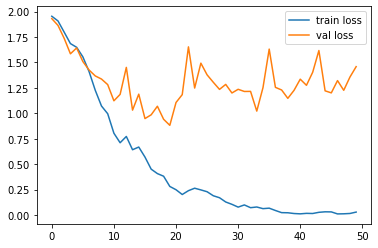

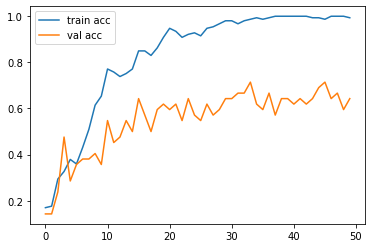

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
from tensorflow.keras.models import load_model

Classifier.save('model_Classifier.h5')

In [20]:
y_pred = Classifier.predict(test_set)

2/2 [==============================] - 1s 86ms/step


In [21]:
y_pred

array([[4.00177414e-05, 8.80142972e-02, 1.43938808e-08, 9.06079292e-01,
        4.95192871e-05, 4.41103522e-03, 1.40579417e-03],
       [3.90080395e-08, 9.99902487e-01, 1.68495981e-11, 1.15145573e-08,
        2.06940296e-08, 1.20203085e-05, 8.54781538e-05],
       [2.27125268e-03, 9.22057092e-01, 4.64662071e-06, 1.05482386e-03,
        8.27710610e-03, 5.33340797e-02, 1.30011421e-02],
       [4.65856601e-07, 2.73970626e-02, 5.70644365e-11, 8.56185972e-04,
        2.46662194e-06, 3.17418635e-01, 6.54325187e-01],
       [9.81154621e-01, 4.57376395e-08, 1.33590568e-02, 1.61529635e-03,
        3.87101085e-03, 2.95864527e-10, 1.17156755e-08],
       [1.16680197e-01, 2.87259968e-06, 1.51556435e-07, 5.79600548e-03,
        8.77487421e-01, 2.29409998e-05, 1.04064120e-05],
       [8.17369390e-03, 4.53759185e-07, 4.81735585e-09, 9.91800129e-01,
        7.26744838e-06, 2.63614851e-07, 1.81600390e-05],
       [9.99937773e-01, 2.58809575e-12, 1.26933719e-09, 6.19704151e-05,
        2.53880899e-07, 1

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([3, 1, 1, 6, 0, 4, 3, 0, 5, 1, 0, 3, 4, 0, 6, 4, 0, 2, 6, 3, 2, 0,
       1, 5, 3, 1, 5, 5, 5, 2, 0, 2, 2, 3, 0, 0, 4, 0, 1, 1, 2, 6],
      dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_Classifier.h5')

In [26]:
img=image.load_img('C:/Users/HP/Desktop/sjc/SEM 2/BDA2321 ML 1/Lab 07/Test/1Hundrednote/1.jpg',target_size=(224,224))

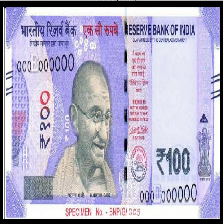

In [27]:
img

In [28]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
result

1/1 [==============================] - 0s 255ms/step


array([[1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
a=np.argmax(model.predict(test_image), axis=1)
a==5

1/1 [==============================] - 0s 105ms/step


array([False])

In [30]:
a==0

array([ True])